In [1]:
import tensorflow as tf
import numpy as np

In [2]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [3]:
import matplotlib.pyplot as plt

# Data 

In [14]:
w_act = 3
b_act = 2

In [17]:
examples = 1000
xs = tf.random.normal(shape=[examples])
actual_data  = (w_act*xs) +b_act

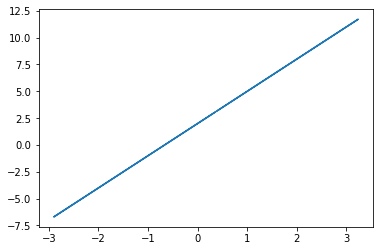

In [19]:
plt.plot(xs,actual_data)

# Simple Model

In [39]:
class Model():
    def __init__(self):
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(1.0)
    def __call__(self, inputs):
        return self.w * inputs + self.b

In [40]:
model = Model()

In [41]:
y_pred = model(xs)

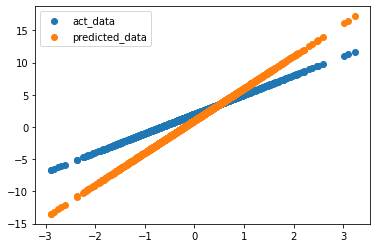

In [42]:
act = plt.scatter(xs,actual_data)
pre = plt.scatter(xs,y_pred)
plt.legend((act, pre),('act_data','predicted_data'))

# Training

- What we have right now ?
 - data
 - model
 
- What we need to train now
 - loss
 - optimizer (SGD)
    - learning rate
 

In [43]:
def loss_func(y_pred, y_act ):
    return tf.reduce_mean(tf.square((y_pred- y_act)))

In [44]:
def training_loop(inputs, y_act, model,lr):
    with tf.GradientTape() as t:
        c_loss = loss_func(model(inputs), y_act)
    dw, db = t.gradient(c_loss,[model.w, model.b])
    model.w.assign_sub(lr*dw)
    model.b.assign_sub(lr*db)
    
    return c_loss

Now we defined the function. Now we need to train it

In [45]:
losses, weightses, biases = [], [],[]
epochs = range(15)
for i in epochs:
    c_loss = training_loop(xs,actual_data, model, 0.1)
    losses.append(c_loss)
    weightses.append(model.w.numpy())
    biases.append(model.b.numpy())
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (i, weightses[-1], biases[-1], c_loss))

Epoch  0: w=4.60 b=1.22, loss=5.06330
Epoch  1: w=4.28 b=1.39, loss=3.21849
Epoch  2: w=4.03 b=1.52, loss=2.04638
Epoch  3: w=3.82 b=1.62, loss=1.30148
Epoch  4: w=3.66 b=1.70, loss=0.82797
Epoch  5: w=3.53 b=1.77, loss=0.52688
Epoch  6: w=3.42 b=1.82, loss=0.33538
Epoch  7: w=3.34 b=1.86, loss=0.21355
Epoch  8: w=3.27 b=1.89, loss=0.13601
Epoch  9: w=3.22 b=1.91, loss=0.08666
Epoch 10: w=3.17 b=1.93, loss=0.05523
Epoch 11: w=3.14 b=1.95, loss=0.03521
Epoch 12: w=3.11 b=1.96, loss=0.02246
Epoch 13: w=3.09 b=1.97, loss=0.01433
Epoch 14: w=3.07 b=1.98, loss=0.00914


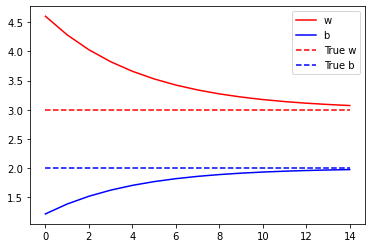

In [46]:
plt.plot(epochs, weightses, 'r',epochs, biases, 'b')
plt.plot([w_act] * len(epochs), 'r--',[b_act] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

In [50]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')

In [51]:
    
weights_list = [{ 'name' : "w",
                  'values' : weightses
                },
                {
                  'name' : "b",
                  'values' : biases
                }]

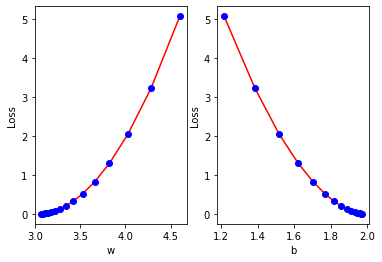

In [52]:

plot_loss_for_weights(weights_list, losses)